# Setup

In [1]:
import os

from absl import logging
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from pipeline.constants import PIPELINE_NAME

from visualization.threshold_optimization import load_best_threshold
from visualization.newest_subdir import NewestLocalPathGetter

In [2]:
logging.set_verbosity(logging.DEBUG)

In [3]:
path_getter = NewestLocalPathGetter(artifact_dir=os.environ['PIPELINE_OUTPUT'], pipeline_name=PIPELINE_NAME)

In [4]:
FILE_PATH = '/tfx_pipeline_output/onboarding/evaluation.csv'

In [5]:
best_threshold = load_best_threshold(path_getter.get_threshold_path('ThresholdOptimizerComponent'))
best_threshold

DEBUG:absl:From 1 subdirs selected '/tfx_pipeline_output/onboarding/ThresholdOptimizerComponent/best_threshold/33' as newest


0.07

# Read evaluation CSV

In [7]:
df = pd.read_csv(
    FILE_PATH, index_col='user_id',
    parse_dates=['sample_extraction', 'stage_one_completion', 'stage_two_completion']
)
df

,stage_one_completion,sample_extraction,predicted_probability,stage_two_completion
user_id,,,,
2093128,2020-08-24 10:54:56,2022-05-19 18:57:04,0.527673,NaT
4075729,2022-04-17 06:49:36,2022-05-19 18:57:04,0.527673,NaT
2257616,2020-08-28 05:52:00,2022-05-19 18:57:04,0.527673,NaT
4034620,2021-06-03 07:02:24,2022-05-19 18:57:04,0.527673,NaT
3079181,2020-08-13 06:43:12,2022-05-19 18:57:04,0.527673,NaT
...,...,...,...,...
4075988,2022-04-20 11:03:28,2022-05-19 18:57:04,0.576838,2022-05-26 13:07:13
4076107,2022-04-21 11:46:08,2022-05-19 18:57:04,0.527673,NaT
4076942,2022-04-30 08:44:48,2022-05-19 18:57:04,0.527673,NaT


## Discretize prediction

In [8]:
df['prediction'] = df.predicted_probability >= best_threshold
df

,stage_one_completion,sample_extraction,predicted_probability,stage_two_completion,prediction
user_id,,,,,
2093128,2020-08-24 10:54:56,2022-05-19 18:57:04,0.527673,NaT,True
4075729,2022-04-17 06:49:36,2022-05-19 18:57:04,0.527673,NaT,True
2257616,2020-08-28 05:52:00,2022-05-19 18:57:04,0.527673,NaT,True
4034620,2021-06-03 07:02:24,2022-05-19 18:57:04,0.527673,NaT,True
3079181,2020-08-13 06:43:12,2022-05-19 18:57:04,0.527673,NaT,True
...,...,...,...,...,...
4075988,2022-04-20 11:03:28,2022-05-19 18:57:04,0.576838,2022-05-26 13:07:13,True
4076107,2022-04-21 11:46:08,2022-05-19 18:57:04,0.527673,NaT,True
4076942,2022-04-30 08:44:48,2022-05-19 18:57:04,0.527673,NaT,True


## Calculate ground truth

In [9]:
df['ground_truth'] = df.stage_two_completion <= df.sample_extraction + pd.DateOffset(days=5)
df

,stage_one_completion,sample_extraction,predicted_probability,stage_two_completion,prediction,ground_truth
user_id,,,,,,
2093128,2020-08-24 10:54:56,2022-05-19 18:57:04,0.527673,NaT,True,False
4075729,2022-04-17 06:49:36,2022-05-19 18:57:04,0.527673,NaT,True,False
2257616,2020-08-28 05:52:00,2022-05-19 18:57:04,0.527673,NaT,True,False
4034620,2021-06-03 07:02:24,2022-05-19 18:57:04,0.527673,NaT,True,False
3079181,2020-08-13 06:43:12,2022-05-19 18:57:04,0.527673,NaT,True,False
...,...,...,...,...,...,...
4075988,2022-04-20 11:03:28,2022-05-19 18:57:04,0.576838,2022-05-26 13:07:13,True,False
4076107,2022-04-21 11:46:08,2022-05-19 18:57:04,0.527673,NaT,True,False
4076942,2022-04-30 08:44:48,2022-05-19 18:57:04,0.527673,NaT,True,False


A quick zoom into the users that progressed

In [10]:
df[~df.stage_two_completion.isna()]

,stage_one_completion,sample_extraction,predicted_probability,stage_two_completion,prediction,ground_truth
user_id,,,,,,
4078189,2022-05-14 10:20:48,2022-05-19 18:57:04,0.027726,2022-05-20 06:16:44,False,True
4025810,2021-03-12 08:36:16,2022-05-19 18:57:04,0.527673,2022-05-26 08:03:36,True,False
4021576,2021-02-04 09:14:40,2022-05-19 18:57:04,0.527673,2022-05-26 11:10:42,True,False
4075251,2022-04-12 06:00:32,2022-05-19 18:57:04,0.527673,2022-05-23 09:46:22,True,True
4070147,2022-02-21 10:35:44,2022-05-19 18:57:04,0.527673,2022-05-24 10:23:21,True,True
...,...,...,...,...,...,...
4076859,2022-04-29 10:10:08,2022-05-19 18:57:04,0.527673,2022-05-24 10:30:47,True,True
4052902,2021-09-30 09:21:04,2022-05-19 18:57:04,0.527673,2022-05-21 06:02:15,True,True
4078638,2022-05-19 05:11:28,2022-05-19 18:57:04,0.056949,2022-05-25 09:11:16,False,False


# Create a subset of users that have recently joined the platform

In [11]:
recent_df = df[(df.sample_extraction- df.stage_one_completion) < pd.Timedelta(HOPELESS_HORIZON, 'd')]
recent_df

,stage_one_completion,sample_extraction,predicted_probability,stage_two_completion,prediction,ground_truth
user_id,,,,,,
4078189,2022-05-14 10:20:48,2022-05-19 18:57:04,0.027726,2022-05-20 06:16:44,False,True
4078240,2022-05-15 14:00:32,2022-05-19 18:57:04,0.161021,NaT,True,False
4078250,2022-05-15 17:31:44,2022-05-19 18:57:04,0.023023,NaT,False,False
4078307,2022-05-16 07:34:24,2022-05-19 18:57:04,0.026267,NaT,False,False
4077901,2022-05-11 12:16:00,2022-05-19 18:57:04,0.009692,NaT,False,False
...,...,...,...,...,...,...
4077894,2022-05-11 10:44:16,2022-05-19 18:57:04,0.015338,NaT,False,False
4077902,2022-05-11 11:24:48,2022-05-19 18:57:04,0.053055,NaT,False,False
4078593,2022-05-18 11:16:16,2022-05-19 18:57:04,0.049100,NaT,False,False


# See statistics about predictions

<AxesSubplot:>

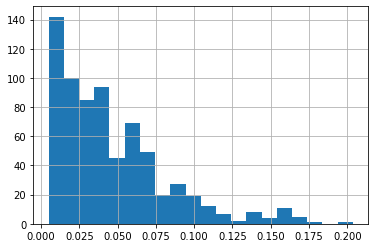

In [12]:
recent_df.predicted_probability.hist(bins=20)

In [13]:
recent_df.prediction.value_counts()

False    562
True     139
Name: prediction, dtype: int64

# See statistics about ground truth

In [14]:
recent_df.ground_truth.value_counts()

False    659
True      42
Name: ground_truth, dtype: int64

# Select data series

In [15]:
y_true = recent_df.ground_truth
y_pred = recent_df.prediction

# Confusion matrix (absolute counts)

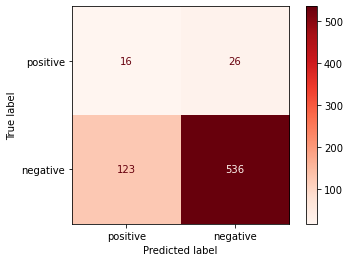

In [16]:
ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred,
    cmap='Reds',
    labels=[True, False], display_labels=['positive', 'negative'],
)
plt.show()

# Confusion matrix (normalized)

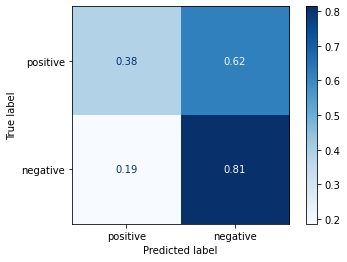

In [17]:
ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred,
    cmap='Blues', normalize='true',
    labels=[True, False], display_labels=['positive', 'negative'],
)
plt.show()

# Accuracy

In [19]:
accuracy_score(y_true, y_pred)

0.7874465049928673

# F1 score

In [22]:
f1_score(y_true, y_pred)

0.17679558011049726